In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
from  tensorflow . keras.models import Sequential
from  tensorflow . keras.layers import Bidirectional,LSTM, Dense
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'clinical ppf.csv' contains your dataset
data = pd.read_csv('clinical eph.csv')

# Split the data into input (X) and output (y) samples
X = data.drop(columns=['intraop_eph'])
y = data['intraop_eph']

# Convert non-numeric values to NaN for each column
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

y = pd.to_numeric(y, errors='coerce')

# Fill NaN values with a specific value (e.g., 0)
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

# Convert X to a numpy array
X = X.to_numpy()

# Fill NaN values in y with 0
y.fillna(0, inplace=True)

scaler = StandardScaler()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Reshape the input data to be 3D for  input [samples, timesteps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

X_train = np.random.randn(100, 10, 1)  
y_train = np.random.randint(0, 2, size=(100,))  

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=(10, 1)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=225, batch_size=32, validation_split=0.2)





Epoch 1/225


3/3 [==============================] - 4s 399ms/step - loss: 0.6937 - accuracy: 0.4875 - val_loss: 0.6902 - val_accuracy: 0.5500
Epoch 2/225
3/3 [==============================] - 0s 23ms/step - loss: 0.6889 - accuracy: 0.5750 - val_loss: 0.6879 - val_accuracy: 0.5500
Epoch 3/225
3/3 [==============================] - 0s 24ms/step - loss: 0.6867 - accuracy: 0.5875 - val_loss: 0.6849 - val_accuracy: 0.5500
Epoch 4/225
3/3 [==============================] - 0s 22ms/step - loss: 0.6844 - accuracy: 0.5750 - val_loss: 0.6828 - val_accuracy: 0.5500
Epoch 5/225
3/3 [==============================] - 0s 21ms/step - loss: 0.6806 - accuracy: 0.5750 - val_loss: 0.6807 - val_accuracy: 0.5500
Epoch 6/225
3/3 [==============================] - 0s 20ms/step - loss: 0.6785 - accuracy: 0.5750 - val_loss: 0.6789 - val_accuracy: 0.5500
Epoch 7/225
3/3 [==============================] - 0s 22ms/step - loss: 0.6776 - accuracy: 0.5750 - val_loss: 0.6777 - val_accuracy: 0.5500
Epoch 8/225
3/

Epoch 1/10
3/3 [==============================] - 0s 56ms/step - loss: 0.0393 - accuracy: 1.0000 - val_loss: 2.1513 - val_accuracy: 0.4500
Epoch 2/10
3/3 [==============================] - 0s 32ms/step - loss: 0.0369 - accuracy: 1.0000 - val_loss: 2.1590 - val_accuracy: 0.4500
Epoch 3/10
3/3 [==============================] - 0s 28ms/step - loss: 0.0359 - accuracy: 1.0000 - val_loss: 2.1709 - val_accuracy: 0.4500
Epoch 4/10
3/3 [==============================] - 0s 28ms/step - loss: 0.0349 - accuracy: 1.0000 - val_loss: 2.1837 - val_accuracy: 0.4500
Epoch 5/10
3/3 [==============================] - 0s 28ms/step - loss: 0.0330 - accuracy: 1.0000 - val_loss: 2.1917 - val_accuracy: 0.4500
Epoch 6/10
3/3 [==============================] - 0s 30ms/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 2.1981 - val_accuracy: 0.4500
Epoch 7/10
3/3 [==============================] - 0s 31ms/step - loss: 0.0308 - accuracy: 1.0000 - val_loss: 2.2051 - val_accuracy: 0.4500
Epoch 8/10
3/3 [===========

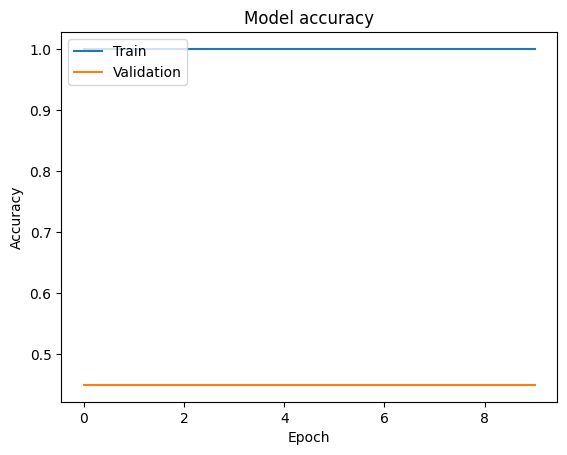

In [2]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit(...)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [3]:
from sklearn.metrics import precision_score

# Assuming y_pred and y_true are your predicted and true labels
y_pred_prob = model.predict(X_train)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

precision = precision_score(y_train, y_pred)
print("Precision:", precision)


4/4 [==============================] - 1s 3ms/step
Precision: 0.8636363636363636


In [4]:
from sklearn.metrics import f1_score

# Assuming y_pred and y_true are your predicted and true labels
y_pred = (model.predict(X_train) > 0.5).astype(int)  # Convert probabilities to binary predictions
f1 = f1_score(y_train, y_pred)

print("F1 Score:", f1)


4/4 [==============================] - 0s 5ms/step
F1 Score: 0.8735632183908046


In [5]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_pred and y_true are your predicted and true labels
y_pred = model.predict(X_train)
y_true = y_train  # Assuming y_train contains the true labels

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print("Root Mean Squared Error:", rmse)

4/4 [==============================] - 0s 3ms/step
Root Mean Squared Error: 0.3066787907665639


In [6]:
from sklearn.metrics import mean_absolute_error

# Assuming y_pred and y_true are your predicted and true labels
y_pred = model.predict(X_train)
y_true = y_train  # Assuming y_train contains the true labels

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)

print("Mean Absolute Error:", mae)


4/4 [==============================] - 0s 5ms/step
Mean Absolute Error: 0.1251858450515158


In [7]:
from sklearn.metrics import recall_score

# Assuming y_pred and y_true are your predicted and true labels
y_pred = (model.predict(X_train) > 0.5).astype(int)  # Convert probabilities to binary predictions
recall = recall_score(y_true, y_pred)

print("Recall:", recall)

4/4 [==============================] - 0s 5ms/step
Recall: 0.8837209302325582


In [8]:
# Calculate precision, recall, F1 score, MAE, and MSE for each epoch
precision = []
recall = []
f1 = []
mae = []
mse = []

for i in range(1, 11):  # Assuming 10 epochs
    y_pred_prob = model.predict(X_train)
    y_pred = (y_pred_prob > 0.5).astype(int)
    precision.append(precision_score(y_train, y_pred))
    recall.append(recall_score(y_train, y_pred))
    f1.append(f1_score(y_train, y_pred))
    mae.append(mean_absolute_error(y_train, y_pred))
    mse.append(mean_squared_error(y_train, y_pred))


4/4 [==============================] - 0s 4ms/step


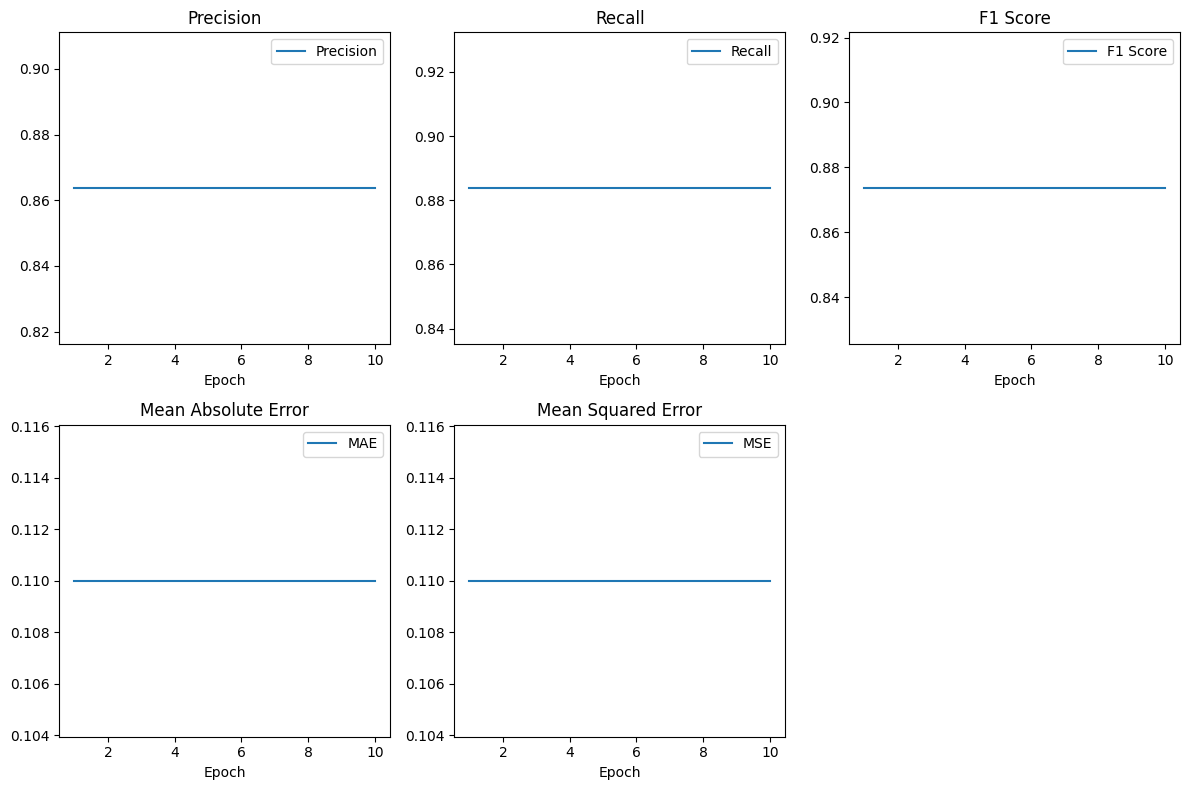

In [9]:
epochs = np.arange(1, 11)  # Assuming 10 epochs

# Plot metrics
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(epochs, precision, label='Precision')
plt.title('Precision')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(epochs, recall, label='Recall')
plt.title('Recall')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(epochs, f1, label='F1 Score')
plt.title('F1 Score')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(epochs, mae, label='MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(epochs, mse, label='MSE')
plt.title('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [2]:
import unittest
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from your_model_module import preprocess_data  # Assuming this is your preprocessing function

class TestAnesthesiaPrediction(unittest.TestCase):

    # Test case for data preprocessing
    def test_data_preprocessing(self):
        # Sample input data (patient vitals, etc.)
        input_data = pd.DataFrame({
            'heart_rate': [80, 90, 85],
            'blood_pressure': [120, 130, 125],
            'age': [45, 50, 60]
        })
        
        # Assuming the preprocess_data function scales the data using StandardScaler
        processed_data = preprocess_data(input_data)
        
        # Check if the processed data is a numpy array and has the expected shape
        self.assertIsInstance(processed_data, np.ndarray)
        self.assertEqual(processed_data.shape, (3, 3))  # Assuming 3 samples, 3 features

    # Test case for missing data handling in preprocessing
    def test_missing_data(self):
        input_data = pd.DataFrame({
            'heart_rate': [80, None, 85],
            'blood_pressure': [120, 130, None],
            'age': [45, 50, 60]
        })
        
        # Assuming the function should handle missing data by replacing with the mean
        processed_data = preprocess_data(input_data)
        
        # Check that missing values have been handled (shouldn't be any NaN values)
        self.assertFalse(np.any(np.isnan(processed_data)))

if __name__ == "__main__":
    unittest.main()


ModuleNotFoundError: No module named 'your_model_module'